In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
visa=pd.read_csv('excel/visa.csv')
visa.head()

,date,open,high,low,close,volume
0,2008-03-19,14.8750,17.2500,13.7500,14.1250,708486000
1,2008-03-20,14.6175,16.2500,14.3750,16.0875,198985200
2,2008-03-24,16.8100,16.9250,14.7500,14.9325,149566400
3,2008-03-25,15.1575,16.0625,14.9550,15.8125,87092000
4,2008-03-26,15.6250,16.1200,15.3925,15.9900,43111600


is there correlation between daily volume and daily profit
https://github.com/taanila/kurssi/blob/master/linreg1.ipynb

profit=[]
for profits in visa['open'], visa['close']:
    visa['open']-visa['close']
    profit.append(profits)
    
profit

In [3]:
#count open price subtract by close price
visaM=visa['close']-visa['open']
#do a pandas DF from profit column
visaM=pd.DataFrame(visaM, index=visa.index)
#add name for profit column
visaM.columns=['profit']
visaM['profit'].head()

0   -0.7500
1    1.4700
2   -1.8775
3    0.6550
4    0.3650
Name: profit, dtype: float64

In [4]:
x=visa['volume'].to_frame()  #feature-matriisi X
y=visaM['profit'] #target eli selitettävä muuttuja eli y-muuttuja

In [5]:
malli = LinearRegression()
malli.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print(malli.coef_) #kulmakerroin
print(malli.intercept_) #vakiotermi
print(malli.score(x,y)) #selityskerroin

[-7.02112698e-10]
0.026061638599750976
0.00041345391339553395


In [7]:
visa=visa.join(visaM)

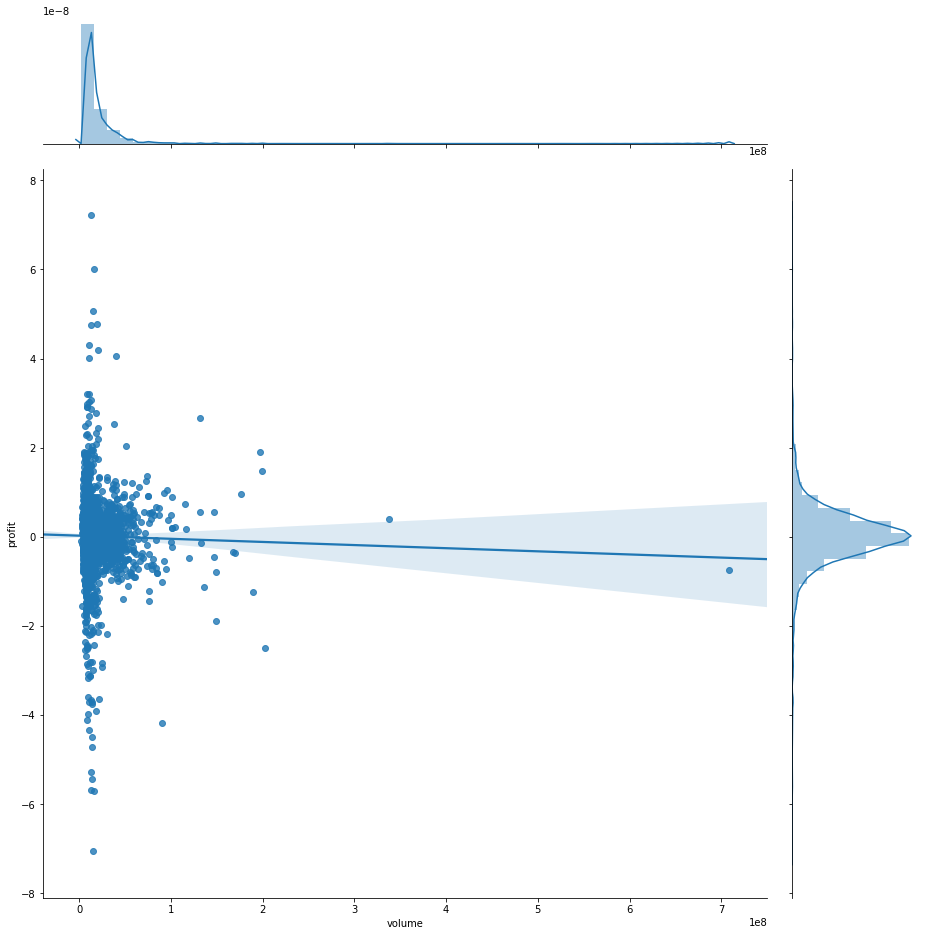

In [10]:
sns.jointplot(data=visa, x='volume', y='profit', kind='reg', size=13)

In [9]:
malli.predict(pd.DataFrame([0.7, 0.8, 0.9]))

array([0.02606164, 0.02606164, 0.02606164])

https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3
https://stackoverflow.com/questions/41535322/setting-freq-of-pandas-datetimeindex-after-dataframe-creation
https://github.com/taanila/kurssi
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe
https://stackoverflow.com/questions/26163702/how-to-change-figuresize-using-seaborn-factorplot